In [1]:
#import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Load data
cgf = pd.read_csv("CardioGoodFitness.csv")

In [3]:
#Explore the data
cgf.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [4]:
#check for missing values
cgf.isnull().sum()

Product          0
Age              0
Gender           0
Education        0
MaritalStatus    0
Usage            0
Fitness          0
Income           0
Miles            0
dtype: int64

In [5]:
#check for duplicates
cgf.duplicated().sum()

0

In [6]:
#check data type

cgf.info()
cgf.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [7]:
#group data by product purchased

grouped_cgf = cgf.groupby("Product")

In [8]:
grouped_cgf_means = grouped_cgf.mean()
grouped_cgf_means

,Age,Education,Usage,Fitness,Income,Miles
Product,,,,,,
TM195,28.55,15.037500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.6250,75441.575,166.900000


In [9]:
grouped_cgf[['Age', 'Education', 'Usage', 'Fitness', 'Income', 'Miles']].agg([np.mean, np.median, np.std, np.min, np.max])

Age                             Education                        \
          mean median       std amin amax       mean median       std amin   
Product                                                                      
TM195    28.55   26.0  7.221452   18   50  15.037500   16.0  1.216383   12   
TM498    28.90   26.0  6.645248   19   48  15.116667   16.0  1.222552   12   
TM798    29.10   27.0  6.971738   22   48  17.325000   18.0  1.639066   14   

              ...     Income                                        \
        amax  ...       mean   median           std   amin    amax   
Product       ...                                                    
TM195     18  ...  46418.025  46617.0   9075.783190  29562   68220   
TM498     18  ...  48973.650  49459.5   8653.989388  31836   67083   
TM798     21  ...  75441.575  76568.5  18505.836720  48556  104581   

              Miles                              
               mean median        std amin amax  
Product                                          
TM195     82.787500   85.0  28.874102   38  188  
TM498     87.933333   85.0  33.263135   21  212  
TM798    166.900000  160.0  60.066544   80  360  

[3 rows x 30 columns]

In [10]:
#Analyzing the distribution for each variable
#Gender distribution

gender = grouped_cgf['Gender'].value_counts().unstack()

#MaritalStatus distribution
maritals = grouped_cgf['MaritalStatus'].value_counts().unstack()

In [11]:
print("Gender Distribution:")
print(gender)

print("\nMarital Status Distribution:")
print(maritals)


Gender Distribution:
Gender   Female  Male
Product              
TM195        40    40
TM498        29    31
TM798         7    33

Marital Status Distribution:
MaritalStatus  Partnered  Single
Product                         
TM195                 48      32
TM498                 36      24
TM798                 23      17


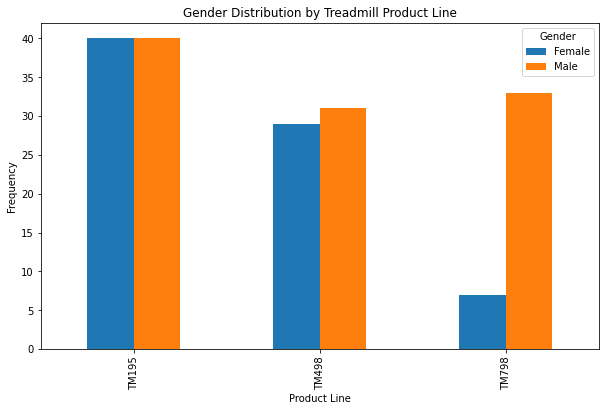

In [12]:
#visualize gender distribution using bar chart
gender.plot(kind='bar', figsize=(10, 6))
plt.title("Gender Distribution by Treadmill Product Line")
plt.xlabel("Product Line")
plt.ylabel("Frequency")
plt.show()

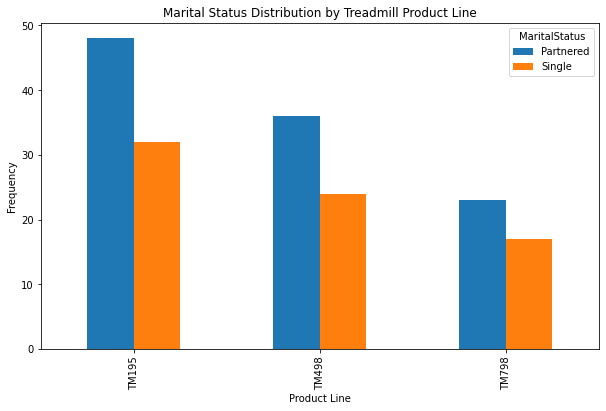

In [13]:
#visualize maritalstatus distribution using bar chart
maritals.plot(kind='bar', figsize=(10, 6))
plt.title("Marital Status Distribution by Treadmill Product Line")
plt.xlabel("Product Line")
plt.ylabel("Frequency")
plt.show()

In [15]:
cgf_encoded = pd.get_dummies(cgf, columns=['Product'])

In [16]:
corr = cgf_encoded.corrwith(cgf_encoded['Income']).filter(like='Product')

In [17]:
print(corr)

Product_TM195   -0.396744
Product_TM498   -0.203871
Product_TM798    0.705368
dtype: float64
